<span style="color:gray; font-weight: bold">Editor:</span> <span style="color:gray; font-weight: bold; font-style: italic">Dar Lador, she codes;</span>

In [10]:
%matplotlib inline
from pandas import *
import matplotlib as mpl
import numpy as np
#from datetime import datetime
mpl.rc('figure', figsize=(12, 6))
set_option('display.notebook_repr_html', False)
set_option('display.max_columns', 18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

### *she codes;* notes
If you try to run `fec = read_csv('P00000001-ALL.txt')` you'll get a `DtypeWarning`, which is a `low_memory` warning. We get it because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. Determining what dtype can only truly be done once the file is read. This means nothing can really be parsed before the whole file is read unless you risk having to change the dtype of that column when you read the last value. For example, consider a file which has a column called `ID`, with milions of rows where the `ID` is always numbers. Since pandas cannot know it is only numbers, it will probably keep it as the original strings until it has read the whole file. If we add something like `dtype={'ID':pandas.np.int64}` to the `read_csv()`, Pandas will read the `ID` column as numbers. 

In practice, we can fix this problem: 1st, write:
```python
fec = read_csv('P00000001-ALL.txt') 
```
It wont read the whole file and will return a low_memory warning. Then, write:
```python
fec.dtypes
```
It returns the dtypes of each column, for example:
```python
'''
cmte_id               object
cand_id               object
cand_nm               object
contb_receipt_amt    float64
...                   ...
file_num               int64
dtype: object
'''
```
Then, you just need to add all of them to a dictionary as I did below:

In [11]:
fec = read_csv('P00000001-ALL.txt', dtype={'contb_receipt_amt': np.float64, 'file_num': np.int64, 'cmte_id': np.object,
                                           'cand_id': np.object, 'cand_nm': np.object, 'contbr_city': np.object, 
                                           'contbr_st': np.object, 'contbr_zip': np.object, 'contbr_employer': np.object, 
                                           'contbr_occupation': np.object, 'contb_receipt_dt': np.object, 'memo_cd': np.object,
                                           'receipt_desc': np.object, 'memo_text': np.object, 'form_tp':np.object})

<ipython-input-11-9ae0ac5c67a3>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fec = read_csv('P00000001-ALL.txt', dtype={'contb_receipt_amt': np.float64, 'file_num': np.int64, 'cmte_id': np.object,
<ipython-input-11-9ae0ac5c67a3>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'cand_id': np.object, 'cand_nm': np.object, 'contbr_city': np.object,
<ipython-input-11-9ae0ac5c67a3>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence 

In [12]:
fec.info(verbose=True) #summery view

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            536041 non-null  object 
 1   cand_id            536041 non-null  object 
 2   cand_nm            536041 non-null  object 
 3   contbr_nm          536041 non-null  object 
 4   contbr_city        536026 non-null  object 
 5   contbr_st          536040 non-null  object 
 6   contbr_zip         535973 non-null  object 
 7   contbr_employer    525088 non-null  object 
 8   contbr_occupation  530520 non-null  object 
 9   contb_receipt_amt  536041 non-null  float64
 10  contb_receipt_dt   536041 non-null  object 
 11  receipt_desc       8479 non-null    object 
 12  memo_cd            49718 non-null   object 
 13  memo_text          52740 non-null   object 
 14  form_tp            536041 non-null  object 
 15  file_num           536041 non-null  int64  
dtypes:

In [5]:
parties    # dictionary

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democrat',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

In [5]:
fec.cand_nm #candidate name

0         Bachmann, Michelle
1         Bachmann, Michelle
2         Bachmann, Michelle
3         Bachmann, Michelle
4         Bachmann, Michelle
5         Bachmann, Michelle
6         Bachmann, Michelle
7         Bachmann, Michelle
8         Bachmann, Michelle
9         Bachmann, Michelle
10        Bachmann, Michelle
11        Bachmann, Michelle
12        Bachmann, Michelle
13        Bachmann, Michelle
14        Bachmann, Michelle
15        Bachmann, Michelle
16        Bachmann, Michelle
17        Bachmann, Michelle
18        Bachmann, Michelle
19        Bachmann, Michelle
20        Bachmann, Michelle
21        Bachmann, Michelle
22        Bachmann, Michelle
23        Bachmann, Michelle
24        Bachmann, Michelle
25        Bachmann, Michelle
26        Bachmann, Michelle
27        Bachmann, Michelle
28        Bachmann, Michelle
29        Bachmann, Michelle
                 ...        
536011           Perry, Rick
536012           Perry, Rick
536013           Perry, Rick
536014        

In [14]:
fec['party'] = fec.cand_nm.map(parties)  # map can take dictionary, series... 
                                         # Alternatively, use list comprehension: [parties[x] for x in fec.cand_nm]
fec.party                                         

0         Republican
1         Republican
2         Republican
3         Republican
4         Republican
             ...    
536036    Republican
536037    Republican
536038    Republican
536039    Republican
536040    Republican
Name: party, Length: 536041, dtype: object

Read about map [here][r].
[r]:http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html

In [16]:
fec.iloc[0]    # A single record.

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                    366010290
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                 250.0
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
party                        Republican
Name: 0, dtype: object

In [17]:
fec.party.value_counts()   # Doing it high level way using histogram. (a histogram of a Series)

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

In [18]:
np.unique(fec.party)

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

In [10]:
fec.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

In [11]:
fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()   # group by party & date --> sum the ammount per date and party
# date is Not a python date object.

party       contb_receipt_dt
Democrat    01-AUG-11            175281.00
            01-DEC-11            651532.82
            01-JAN-12             58098.80
            01-JUL-11            165961.00
            01-JUN-11            145459.00
            01-MAY-11             82644.00
            01-NOV-11            122529.87
            01-OCT-11            148977.00
            01-SEP-11            403297.62
            02-AUG-11            164510.11
            02-DEC-11            216056.96
            02-JAN-12             89743.60
            02-JUL-11             17105.00
            02-JUN-11            422453.00
            02-MAY-11            396675.00
            02-NOV-11            147183.81
            02-OCT-11             62605.62
            02-SEP-11            137948.41
            03-AUG-11            147053.02
            03-DEC-11             81304.02
            03-JAN-12             87406.97
            03-JUL-11              5982.00
            03-JUN-11    

In [12]:
fec.contb_receipt_dt[0]

'20-JUN-11'

In [13]:
print(months)

{'APR': 4, 'MAR': 3, 'OCT': 10, 'MAY': 5, 'JAN': 1, 'DEC': 12, 'JUL': 7, 'AUG': 8, 'FEB': 2, 'SEP': 9, 'NOV': 11, 'JUN': 6}


### *she codes;* notes
As I told you, this is an old video. You don't need to import datetime and write a fuction that convert strings to dates. You just need to write
```python
fec['contb_receipt_dt'] = to_datetime(fec['contb_receipt_dt'], format='%d-%b-%y')
```

In [20]:
fec['contb_receipt_dt'] = to_datetime(fec['contb_receipt_dt'], format='%d-%b-%y')    # converts the date- time
fec.contb_receipt_dt[0]

Timestamp('2011-06-20 00:00:00')

In [16]:
fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum() # Same as above, however, date converted to python object.

party       contb_receipt_dt
Democrat    2011-04-04           640235.12
            2011-04-05           307641.00
            2011-04-06           247542.59
            2011-04-07           252336.00
            2011-04-08           295452.00
            2011-04-09           105879.00
            2011-04-10           100373.00
            2011-04-11           360728.00
            2011-04-12           405160.46
            2011-04-13           382836.33
            2011-04-14           306643.50
            2011-04-15           408377.00
            2011-04-16            82658.00
            2011-04-17            70802.00
            2011-04-18           501971.37
            2011-04-19           304874.00
            2011-04-20           314540.11
            2011-04-21           315618.00
            2011-04-22           295464.45
            2011-04-23            34829.00
            2011-04-24            37100.00
            2011-04-25           447282.00
            2011-04-26   

In [22]:
by_date = fec.groupby(['party', 'contb_receipt_dt'])['contb_receipt_amt'].sum()    # save it to a series with 2 indexes
by_date

party       contb_receipt_dt
Democrat    2011-04-04          640235.12
            2011-04-05          307641.00
            2011-04-06          247542.59
            2011-04-07          252336.00
            2011-04-08          295452.00
                                  ...    
Republican  2012-01-27          368441.82
            2012-01-28           82775.80
            2012-01-29           75220.02
            2012-01-30          255204.80
            2012-01-31          869890.41
Name: contb_receipt_amt, Length: 1183, dtype: float64

In [23]:
by_date.unstack('party')    # unstack the party = puts the parties in the column names instead of index


party               Democrat  Libertarian   Reform  Republican
contb_receipt_dt                                              
2011-01-01               NaN          NaN      NaN     8600.00
2011-01-03               NaN          NaN      NaN     4800.00
2011-01-04               NaN          NaN      NaN     5000.00
2011-01-12               NaN          NaN      NaN     4150.00
2011-01-13               NaN          NaN      NaN     4000.00
...                      ...          ...      ...         ...
2012-01-27         305785.47          NaN  3176.37   368441.82
2012-01-28         235492.85          NaN   175.00    82775.80
2012-01-29          93177.00          NaN   200.00    75220.02
2012-01-30         435921.72          NaN   130.00   255204.80
2012-01-31        1418410.31          NaN   150.00   869890.41

[376 rows x 4 columns]

In [18]:

by_date.unstack('party').info(verbose=True)   # Indexes are dates. Columns are political parties.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376 entries, 2011-01-01 to 2012-01-31
Data columns (total 4 columns):
Democrat       303 non-null float64
Libertarian    190 non-null float64
Reform         314 non-null float64
Republican     376 non-null float64
dtypes: float64(4)
memory usage: 14.7 KB


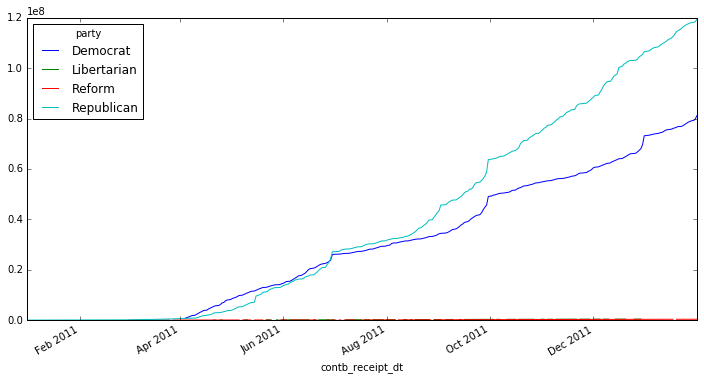

In [19]:
by_date.unstack('party').cumsum().plot()    # cumulative sum over time

In [25]:
s = by_date.unstack('party')[-5:].stack() #only the last 5 indexes

In [21]:
s    # Note the inner level indexes. Not every date has 3 parties. Top level indexes are dates. stack() makes 1 dimensional.
     # Labels propagated down for all 3 observations: political parties.

contb_receipt_dt  party     
2012-01-27        Democrat       305785.47
                  Reform           3176.37
                  Republican     368441.82
2012-01-28        Democrat       235492.85
                  Reform            175.00
                  Republican      82775.80
2012-01-29        Democrat        93177.00
                  Reform            200.00
                  Republican      75220.02
2012-01-30        Democrat       435921.72
                  Reform            130.00
                  Republican     255204.80
2012-01-31        Democrat      1418410.31
                  Reform            150.00
                  Republican     869890.41
dtype: float64

In [22]:
set_option('display.notebook_repr_html', False)  # turn off html, i.e., without table.
s.unstack()    # unstack() =  2 dimensional. 

party               Democrat   Reform  Republican
contb_receipt_dt                                 
2012-01-27         305785.47  3176.37   368441.82
2012-01-28         235492.85   175.00    82775.80
2012-01-29          93177.00   200.00    75220.02
2012-01-30         435921.72   130.00   255204.80
2012-01-31        1418410.31   150.00   869890.41

In [23]:
s.unstack().stack()  # 2 dimensional to 1 dimensional

contb_receipt_dt  party     
2012-01-27        Democrat       305785.47
                  Reform           3176.37
                  Republican     368441.82
2012-01-28        Democrat       235492.85
                  Reform            175.00
                  Republican      82775.80
2012-01-29        Democrat        93177.00
                  Reform            200.00
                  Republican      75220.02
2012-01-30        Democrat       435921.72
                  Reform            130.00
                  Republican     255204.80
2012-01-31        Democrat      1418410.31
                  Reform            150.00
                  Republican     869890.41
dtype: float64

In [24]:
df = s.unstack('party')   # data frame

In [25]:
s.unstack('contb_receipt_dt')

contb_receipt_dt  2012-01-27  2012-01-28  2012-01-29  2012-01-30  2012-01-31
party                                                                       
Democrat           305785.47   235492.85    93177.00   435921.72  1418410.31
Reform               3176.37      175.00      200.00      130.00      150.00
Republican         368441.82    82775.80    75220.02   255204.80   869890.41

In [26]:
concat([df, df], axis=1, keys=['A', 'B'])  # join 2 copies of data frame.
                                           # standard hierarchical indexing stuff.

                           A                               B           \
party               Democrat   Reform Republican    Democrat   Reform   
contb_receipt_dt                                                        
2012-01-27         305785.47  3176.37  368441.82   305785.47  3176.37   
2012-01-28         235492.85   175.00   82775.80   235492.85   175.00   
2012-01-29          93177.00   200.00   75220.02    93177.00   200.00   
2012-01-30         435921.72   130.00  255204.80   435921.72   130.00   
2012-01-31        1418410.31   150.00  869890.41  1418410.31   150.00   

                             
party            Republican  
contb_receipt_dt             
2012-01-27        368441.82  
2012-01-28         82775.80  
2012-01-29         75220.02  
2012-01-30        255204.80  
2012-01-31        869890.41  

In [27]:
concat([df, df], axis=1, keys=['A', 'B'])['A']   # select out columns by the first key 'A'. Or select out the 'B' group.conc

party               Democrat   Reform  Republican
contb_receipt_dt                                 
2012-01-27         305785.47  3176.37   368441.82
2012-01-28         235492.85   175.00    82775.80
2012-01-29          93177.00   200.00    75220.02
2012-01-30         435921.72   130.00   255204.80
2012-01-31        1418410.31   150.00   869890.41

In [28]:
concat([df, df], axis=1, keys=['A', 'B']).stack('party')

                                      A           B
contb_receipt_dt party                             
2012-01-27       Democrat     305785.47   305785.47
                 Reform         3176.37     3176.37
                 Republican   368441.82   368441.82
2012-01-28       Democrat     235492.85   235492.85
                 Reform          175.00      175.00
                 Republican    82775.80    82775.80
2012-01-29       Democrat      93177.00    93177.00
                 Reform          200.00      200.00
                 Republican    75220.02    75220.02
2012-01-30       Democrat     435921.72   435921.72
                 Reform          130.00      130.00
                 Republican   255204.80   255204.80
2012-01-31       Democrat    1418410.31  1418410.31
                 Reform          150.00      150.00
                 Republican   869890.41   869890.41

In [29]:
concat([df, df], axis=1, keys=['A', 'B']).stack(0)  # The group indexes have no labels.

party                 Democrat   Reform  Republican
contb_receipt_dt                                   
2012-01-27       A   305785.47  3176.37   368441.82
                 B   305785.47  3176.37   368441.82
2012-01-28       A   235492.85   175.00    82775.80
                 B   235492.85   175.00    82775.80
2012-01-29       A    93177.00   200.00    75220.02
                 B    93177.00   200.00    75220.02
2012-01-30       A   435921.72   130.00   255204.80
                 B   435921.72   130.00   255204.80
2012-01-31       A  1418410.31   150.00   869890.41
                 B  1418410.31   150.00   869890.41

In [26]:
result = fec.groupby(['cand_nm', 'contbr_occupation'])['contb_receipt_amt'].sum()   
# Top contributors to candidates by occupation.

In [31]:
result  # is a data frame instead of series.

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
    

In [27]:
result[:, 'ZOMBIE SLAYER']

cand_nm
Paul, Ron    1556.0
Name: contb_receipt_amt, dtype: float64

In [33]:
result = fec.groupby(['cand_nm', 'contbr_occupation']).sum().info(verbose=True) 
# When doing this aggregation, we don't need to select the columns as above.
# There are columns that are not possible to sum. The code actually tries to sum them all: nuisance columns. 
# Whenever it fails, it just silently drops them out.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40161 entries, (Bachmann, Michelle, 100% DISABLED VETERAN) to (Santorum, Rick, YOUTH MINISTER)
Data columns (total 2 columns):
contb_receipt_amt    40161 non-null float64
file_num             40161 non-null int64
dtypes: float64(1), int64(1)
memory usage: 941.3+ KB


In [28]:
result.head()

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN             1869.50
                    100% DISABLED VIETNAM VETERAN      236.25
                    A/C AND HEAT                       250.00
                    ACADEMIC EMPLOYMENT SPECIALIST      25.00
                    ACCOUNT                             50.00
Name: contb_receipt_amt, dtype: float64

In [29]:
result = fec.groupby(['cand_nm', 'contbr_occupation']).sum().reset_index()  
# opposite of set_index(). Took 'cand_nm' and 'contbr_occupation' and set them as col indexes again, 
#  so that the indexes are just simple integer indexes.
result.head()

              cand_nm               contbr_occupation  contb_receipt_amt  \
0  Bachmann, Michelle           100% DISABLED VETERAN            1869.50   
1  Bachmann, Michelle   100% DISABLED VIETNAM VETERAN             236.25   
2  Bachmann, Michelle                    A/C AND HEAT             250.00   
3  Bachmann, Michelle  ACADEMIC EMPLOYMENT SPECIALIST              25.00   
4  Bachmann, Michelle                         ACCOUNT              50.00   

   file_num  
0   6807894  
1   2260398  
2    749016  
3    762366  
4    762366  

In [35]:
result.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40161 entries, 0 to 40160
Data columns (total 4 columns):
cand_nm              40161 non-null object
contbr_occupation    40161 non-null object
contb_receipt_amt    40161 non-null float64
file_num             40161 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [30]:
# We have so far aggregated total amount donated to each political party by occupation (the first groupby).
# Additional groupby let us split them up by candidate, sort them in descending order by total amount donated and take the top 5.
set_option('display.notebook_repr_html', True)
def top5_donors(group):
    return group.sort_values(by='contb_receipt_amt')[-5:]
# top5_donors(result)
result.groupby('cand_nm').apply(top5_donors)   # The retired donated the most to Barack Obama.

cand_nm  \
cand_nm                                        
Bachmann, Michelle 920    Bachmann, Michelle   
                   892    Bachmann, Michelle   
                   555    Bachmann, Michelle   
                   594    Bachmann, Michelle   
                   1058   Bachmann, Michelle   
...                                      ...   
Santorum, Rick     38856      Santorum, Rick   
                   39180      Santorum, Rick   
                   39341      Santorum, Rick   
                   39305      Santorum, Rick   
                   39812      Santorum, Rick   

                                             contbr_occupation  \
cand_nm                                                          
Bachmann, Michelle 920                               PRESIDENT   
                   892                               PHYSICIAN   
                   555                               HOMEMAKER   
                   594                   INFORMATION REQUESTED   
                   1058                                RETIRED   
...                                                        ...   
Santorum, Rick     38856                              ATTORNEY   
                   39180                             EXECUTIVE   
                   39341  INFORMATION REQUESTED (BEST EFFORTS)   
                   39305                             HOMEMAKER   
                   39812                               RETIRED   

                          contb_receipt_amt    file_num  
cand_nm                                                  
Bachmann, Michelle 920             68781.00    95289630  
                   892             76134.00   198136204  
                   555            102540.00   237509004  
                   594            147638.89   835457555  
                   1058           824618.05  3260564234  
...                                     ...         ...  
Santorum, Rick     38856          107130.00   189114568  
                   39180          131456.55   106279150  
                   39341          284718.10   502656827  
                   39305          350597.75   502312893  
                   39812          421952.98  1341605527  

[65 rows x 4 columns]

In [34]:
result._data   
# Internal data structure. The back data frame. 
# Having hierarchical indexing medicates a lot of the need for higher dimensional objects (because they're very sparse).

BlockManager
Items: Index(['cand_nm', 'contbr_occupation', 'contb_receipt_amt', 'file_num'], dtype='object')
Axis 1: RangeIndex(start=0, stop=40161, step=1)
FloatBlock: slice(2, 3, 1), 1 x 40161, dtype: float64
IntBlock: slice(3, 4, 1), 1 x 40161, dtype: int64
ObjectBlock: slice(0, 2, 1), 2 x 40161, dtype: object

In [33]:
# Time Series for financial data will be improved next.